In [2]:
!pip install pyforest

  Created wheel for pyforest: filename=pyforest-1.0.3-py2.py3-none-any.whl size=13716 sha256=01eeff17392265d7cbe466f6c6253609cdd454d90e470efc82e42aa688fba24d
  Stored in directory: /root/.cache/pip/wheels/af/0b/39/340a7f15fc8d4ff5ab50847b28789afea04452a9d51b9721b5
Successfully built pyforest


In [3]:
# importing libraries
from pyforest import *
# seeing all the libraries that were imported
lazy_imports()
import warnings
warnings.filterwarnings('ignore')

In [4]:
# reading the train dataset
df = pd.read_csv('/content/drive/MyDrive/CRedit Card Lead Prediction/train.csv')
df.head()

<IPython.core.display.Javascript object>

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [6]:
# checking duplicate values
df.duplicated().sum()

0

In [7]:
# dropping ID column as it would be unique for each customer and it would give no further knowledge to ML
df.drop(['ID'], axis=1, inplace=True)
df.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [8]:
# checking for missing values 
df.isnull().sum()

Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [9]:
# seperating independent and dependent features
x = df.iloc[:, :-1]
y = df['Is_Lead']
x.shape, y.shape

((245725, 9), (245725,))

In [10]:
test = pd.read_csv('/content/drive/MyDrive/CRedit Card Lead Prediction/test.csv')
test.head()

<IPython.core.display.Javascript object>

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [11]:
# checking duplicate values
test.duplicated().sum()

0

In [12]:
test.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

In [13]:
# dropping ID column as it would be unique for each customer and it would give no further knowledge to ML
test.drop(['ID'], axis=1, inplace=True)
test.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,Male,29,RG254,Other,X1,25,Yes,742366,No
1,Male,43,RG268,Other,X2,49,NaN,925537,No
2,Male,31,RG270,Salaried,X1,14,No,215949,No
3,Male,29,RG272,Other,X1,33,No,868070,No
4,Female,29,RG270,Other,X1,19,No,657087,No


In [18]:
!pip install feature-engine

     |████████████████████████████████| 153kB 3.0MB/s 
     |████████████████████████████████| 9.5MB 9.6MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [19]:
from feature_engine.imputation import CategoricalImputer

# we call the imputer from featur- engine
# we don't need to specify anything 

imputer = CategoricalImputer()

imputer.fit(x)

CategoricalImputer(fill_value='Missing', imputation_method='missing',
                   return_object=False,
                   variables=['Region_Code', 'Occupation', 'Channel_Code',
                              'Credit_Product', 'Is_Active'])

In [20]:
imputer.variables

['Region_Code', 'Occupation', 'Channel_Code', 'Credit_Product', 'Is_Active']

In [21]:
x = imputer.transform(x)
x.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,0,73,RG268,Other,X3,43,No,1045696,No
1,0,30,RG277,Salaried,X1,32,No,581988,No
2,0,56,RG268,Self_Employed,X3,26,No,1484315,Yes
3,1,34,RG270,Salaried,X1,19,No,470454,No
4,0,30,RG282,Salaried,X1,33,No,886787,No


In [22]:
x.isnull().sum()

Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
dtype: int64

In [24]:
test = imputer.transform(test)
test.isnull().sum()

Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
dtype: int64

<IPython.core.display.Javascript object>

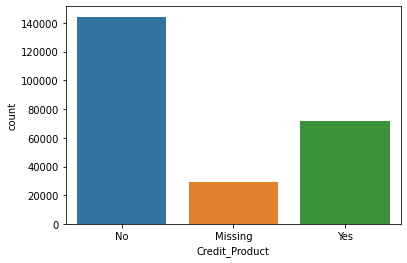

In [25]:
sns.countplot(x['Credit_Product'])

<IPython.core.display.Javascript object>

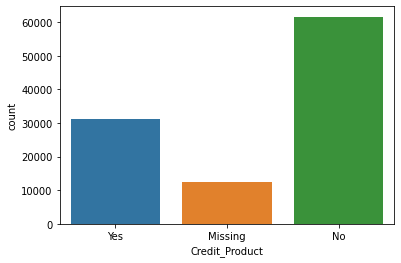

In [26]:
sns.countplot(test['Credit_Product'])

In [27]:
# label encoding gender, credit_product and is_Active
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
# le.fit(df['Gender'])
# le.fit(df['Credit_Product'])
# le.fit(df['Is_Active'])


x['Gender'] = le.fit_transform(x['Gender'])
x['Credit_Product'] = le.fit_transform(x['Credit_Product'])
x['Is_Active'] = le.fit_transform(x['Is_Active'])
x['Region_Code'] = le.fit_transform(x['Region_Code'])
x['Occupation'] = le.fit_transform(x['Occupation'])
x['Channel_Code'] = le.fit_transform(x['Channel_Code'])


x.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,0,73,18,1,2,43,1,1045696,0
1,0,30,27,2,0,32,1,581988,0
2,0,56,18,3,2,26,1,1484315,1
3,1,34,20,2,0,19,1,470454,0
4,0,30,32,2,0,33,1,886787,0


In [28]:
# test data
# test = new_test.copy()
test['Gender'] = le.fit_transform(test['Gender'])
test['Credit_Product'] = le.fit_transform(test['Credit_Product'])
test['Is_Active'] = le.fit_transform(test['Is_Active'])
test['Region_Code'] = le.fit_transform(test['Region_Code'])
test['Occupation'] = le.fit_transform(test['Occupation'])
test['Channel_Code'] = le.fit_transform(test['Channel_Code'])

test.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,1,29,4,1,0,25,2,742366,0
1,1,43,18,1,1,49,0,925537,0
2,1,31,20,2,0,14,1,215949,0
3,1,29,22,1,0,33,1,868070,0
4,0,29,20,1,0,19,1,657087,0


In [34]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=4)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((164635, 9), (81090, 9), (164635,), (81090,))

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
# pr curve and pr auc 
from sklearn.datasets import make_classification
from sklearn.dummy import DummyClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

In [36]:
from xgboost import XGBClassifier

xg = XGBClassifier()

xg.fit(x_train, y_train)

xg_accuracies = cross_val_score(xg, X=x_test, y=y_test, cv=10)

print('Accuracies" \n', xg_accuracies)
print()
print('Mean Accuracy: ', xg_accuracies.mean())

Accuracies" 
 [0.85941546 0.85978542 0.86003206 0.85682575 0.86767789 0.86249846
 0.86064866 0.85892219 0.85855223 0.85867555]

Mean Accuracy:  0.8603033666296707


In [37]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }

def objective(space):

    xgbc = xgb.XGBClassifier(
                    n_estimators =space['n_estimators'], 
                    max_depth = int(space['max_depth']), 
                    gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),
                    min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [(x_train, y_train), (x_test, y_test)]
    
    xgbc.fit(x_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = xgbc.predict(x_test)
    accuracy = accuracy_score(y_test, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

  0%|          | 0/100 [00:00<?, ?it/s, best loss: ?]

<IPython.core.display.Javascript object>

SCORE:
0.8410161548896288
  1%|          | 1/100 [00:05<08:37,  5.23s/it, best loss: -0.8410161548896288]

<IPython.core.display.Javascript object>

SCORE:
0.8411271426809718
  2%|▏         | 2/100 [00:10<08:38,  5.30s/it, best loss: -0.8411271426809718]

<IPython.core.display.Javascript object>

SCORE:
0.8409174990751017
  3%|▎         | 3/100 [00:15<08:33,  5.29s/it, best loss: -0.8411271426809718]

<IPython.core.display.Javascript object>

SCORE:
0.8410284868664447
  4%|▍         | 4/100 [00:21<08:29,  5.31s/it, best loss: -0.8411271426809718]

<IPython.core.display.Javascript object>

SCORE:
0.8408558391910224
  5%|▌         | 5/100 [00:26<08:19,  5.26s/it, best loss: -0.8411271426809718]

<IPython.core.display.Javascript object>

SCORE:
0.8410531508200765
  6%|▌         | 6/100 [00:31<08:14,  5.26s/it, best loss: -0.8411271426809718]

<IPython.core.display.Javascript object>

SCORE:
0.8409298310519177
  7%|▋         | 7/100 [00:36<08:08,  5.25s/it, best loss: -0.8411271426809718]

<IPython.core.display.Javascript object>

SCORE:
0.8407941793069429
  8%|▊         | 8/100 [00:42<08:01,  5.23s/it, best loss: -0.8411271426809718]

<IPython.core.display.Javascript object>

SCORE:
0.8411394746577876
  9%|▉         | 9/100 [00:47<08:01,  5.29s/it, best loss: -0.8411394746577876]

<IPython.core.display.Javascript object>

SCORE:
0.8409421630287335
 10%|█         | 10/100 [00:52<07:57,  5.31s/it, best loss: -0.8411394746577876]

<IPython.core.display.Javascript object>

SCORE:
0.8410531508200765
 11%|█         | 11/100 [00:58<07:54,  5.33s/it, best loss: -0.8411394746577876]

<IPython.core.display.Javascript object>

SCORE:
0.841003822912813
 12%|█▏        | 12/100 [01:03<07:50,  5.34s/it, best loss: -0.8411394746577876]

<IPython.core.display.Javascript object>

SCORE:
0.841003822912813
 13%|█▎        | 13/100 [01:09<07:47,  5.37s/it, best loss: -0.8411394746577876]

<IPython.core.display.Javascript object>

SCORE:
0.8411394746577876
 14%|█▍        | 14/100 [01:14<07:43,  5.39s/it, best loss: -0.8411394746577876]

<IPython.core.display.Javascript object>

SCORE:
0.8409298310519177
 15%|█▌        | 15/100 [01:19<07:32,  5.33s/it, best loss: -0.8411394746577876]

<IPython.core.display.Javascript object>

SCORE:
0.8408805031446541
 16%|█▌        | 16/100 [01:25<07:29,  5.35s/it, best loss: -0.8411394746577876]

<IPython.core.display.Javascript object>

SCORE:
0.8408558391910224
 17%|█▋        | 17/100 [01:30<07:18,  5.28s/it, best loss: -0.8411394746577876]

<IPython.core.display.Javascript object>

SCORE:
0.8409544950055494
 18%|█▊        | 18/100 [01:35<07:13,  5.29s/it, best loss: -0.8411394746577876]

<IPython.core.display.Javascript object>

SCORE:
0.841003822912813
 19%|█▉        | 19/100 [01:40<07:07,  5.28s/it, best loss: -0.8411394746577876]

<IPython.core.display.Javascript object>

SCORE:
0.8409668269823652
 20%|██        | 20/100 [01:45<06:57,  5.22s/it, best loss: -0.8411394746577876]

<IPython.core.display.Javascript object>

SCORE:
0.8411518066346035
 21%|██        | 21/100 [01:51<06:56,  5.27s/it, best loss: -0.8411518066346035]

<IPython.core.display.Javascript object>

SCORE:
0.84110247872734
 22%|██▏       | 22/100 [01:56<06:55,  5.33s/it, best loss: -0.8411518066346035]

<IPython.core.display.Javascript object>

SCORE:
0.841003822912813
 23%|██▎       | 23/100 [02:02<06:49,  5.32s/it, best loss: -0.8411518066346035]

<IPython.core.display.Javascript object>

SCORE:
0.84110247872734
 24%|██▍       | 24/100 [02:07<06:47,  5.36s/it, best loss: -0.8411518066346035]

<IPython.core.display.Javascript object>

SCORE:
0.8410901467505241
 25%|██▌       | 25/100 [02:12<06:41,  5.36s/it, best loss: -0.8411518066346035]

<IPython.core.display.Javascript object>

SCORE:
0.8411518066346035
 26%|██▌       | 26/100 [02:18<06:38,  5.39s/it, best loss: -0.8411518066346035]

<IPython.core.display.Javascript object>

SCORE:
0.8411518066346035
 27%|██▋       | 27/100 [02:23<06:32,  5.38s/it, best loss: -0.8411518066346035]

<IPython.core.display.Javascript object>

SCORE:
0.8409791589591812
 28%|██▊       | 28/100 [02:28<06:26,  5.36s/it, best loss: -0.8411518066346035]

<IPython.core.display.Javascript object>

SCORE:
0.8411394746577876
 29%|██▉       | 29/100 [02:34<06:21,  5.38s/it, best loss: -0.8411518066346035]

<IPython.core.display.Javascript object>

SCORE:
0.8411394746577876
 30%|███       | 30/100 [02:39<06:16,  5.38s/it, best loss: -0.8411518066346035]

<IPython.core.display.Javascript object>

SCORE:
0.8411518066346035
 31%|███       | 31/100 [02:45<06:11,  5.39s/it, best loss: -0.8411518066346035]

<IPython.core.display.Javascript object>

SCORE:
0.8409791589591812
 32%|███▏      | 32/100 [02:50<06:05,  5.37s/it, best loss: -0.8411518066346035]

<IPython.core.display.Javascript object>

SCORE:
0.8411518066346035
 33%|███▎      | 33/100 [02:55<06:00,  5.38s/it, best loss: -0.8411518066346035]

<IPython.core.display.Javascript object>

SCORE:
0.8410408188432605
 34%|███▍      | 34/100 [03:01<05:54,  5.38s/it, best loss: -0.8411518066346035]

<IPython.core.display.Javascript object>

SCORE:
0.8410161548896288
 35%|███▌      | 35/100 [03:06<05:49,  5.38s/it, best loss: -0.8411518066346035]

<IPython.core.display.Javascript object>

SCORE:
0.8409791589591812
 36%|███▌      | 36/100 [03:12<05:43,  5.37s/it, best loss: -0.8411518066346035]

<IPython.core.display.Javascript object>

SCORE:
0.8409544950055494
 37%|███▋      | 37/100 [03:17<05:37,  5.36s/it, best loss: -0.8411518066346035]

<IPython.core.display.Javascript object>

SCORE:
0.8411518066346035
 38%|███▊      | 38/100 [03:22<05:32,  5.37s/it, best loss: -0.8411518066346035]

<IPython.core.display.Javascript object>

SCORE:
0.8408805031446541
 39%|███▉      | 39/100 [03:27<05:25,  5.33s/it, best loss: -0.8411518066346035]

<IPython.core.display.Javascript object>

SCORE:
0.8410901467505241
 40%|████      | 40/100 [03:33<05:22,  5.37s/it, best loss: -0.8411518066346035]

<IPython.core.display.Javascript object>

SCORE:
0.8411394746577876
 41%|████      | 41/100 [03:38<05:17,  5.39s/it, best loss: -0.8411518066346035]

<IPython.core.display.Javascript object>

SCORE:
0.8409051670982859
 42%|████▏     | 42/100 [03:44<05:07,  5.31s/it, best loss: -0.8411518066346035]

<IPython.core.display.Javascript object>

SCORE:
0.8409668269823652
 43%|████▎     | 43/100 [03:49<05:02,  5.31s/it, best loss: -0.8411518066346035]

<IPython.core.display.Javascript object>

SCORE:
0.8409668269823652
 44%|████▍     | 44/100 [03:54<04:57,  5.32s/it, best loss: -0.8411518066346035]

<IPython.core.display.Javascript object>

SCORE:
0.8411148107041558
 45%|████▌     | 45/100 [04:00<04:54,  5.35s/it, best loss: -0.8411518066346035]

<IPython.core.display.Javascript object>

SCORE:
0.8409298310519177
 46%|████▌     | 46/100 [04:05<04:48,  5.34s/it, best loss: -0.8411518066346035]

<IPython.core.display.Javascript object>

SCORE:
0.8409668269823652
 47%|████▋     | 47/100 [04:10<04:39,  5.27s/it, best loss: -0.8411518066346035]

<IPython.core.display.Javascript object>

SCORE:
0.8411518066346035
 48%|████▊     | 48/100 [04:15<04:35,  5.30s/it, best loss: -0.8411518066346035]

<IPython.core.display.Javascript object>

SCORE:
0.8409791589591812
 49%|████▉     | 49/100 [04:21<04:30,  5.31s/it, best loss: -0.8411518066346035]

<IPython.core.display.Javascript object>

SCORE:
0.8410161548896288
 50%|█████     | 50/100 [04:26<04:26,  5.32s/it, best loss: -0.8411518066346035]

<IPython.core.display.Javascript object>

SCORE:
0.8410531508200765
 51%|█████     | 51/100 [04:31<04:21,  5.33s/it, best loss: -0.8411518066346035]

<IPython.core.display.Javascript object>

SCORE:
0.8408681711678382
 52%|█████▏    | 52/100 [04:37<04:15,  5.31s/it, best loss: -0.8411518066346035]

<IPython.core.display.Javascript object>

SCORE:
0.8408065112837588
 53%|█████▎    | 53/100 [04:42<04:07,  5.26s/it, best loss: -0.8411518066346035]

<IPython.core.display.Javascript object>

SCORE:
0.8407941793069429
 54%|█████▍    | 54/100 [04:47<04:00,  5.23s/it, best loss: -0.8411518066346035]

<IPython.core.display.Javascript object>

SCORE:
0.8411394746577876
 55%|█████▌    | 55/100 [04:52<03:57,  5.29s/it, best loss: -0.8411518066346035]

<IPython.core.display.Javascript object>

SCORE:
0.8411518066346035
 56%|█████▌    | 56/100 [04:58<03:53,  5.31s/it, best loss: -0.8411518066346035]

<IPython.core.display.Javascript object>

SCORE:
0.8411394746577876
 57%|█████▋    | 57/100 [05:03<03:49,  5.34s/it, best loss: -0.8411518066346035]

<IPython.core.display.Javascript object>

SCORE:
0.8411394746577876
 58%|█████▊    | 58/100 [05:09<03:46,  5.39s/it, best loss: -0.8411518066346035]

<IPython.core.display.Javascript object>

SCORE:
0.8409668269823652
 59%|█████▉    | 59/100 [05:14<03:41,  5.40s/it, best loss: -0.8411518066346035]

<IPython.core.display.Javascript object>

SCORE:
0.8409544950055494
 60%|██████    | 60/100 [05:19<03:35,  5.39s/it, best loss: -0.8411518066346035]

<IPython.core.display.Javascript object>

SCORE:
0.8411271426809718
 61%|██████    | 61/100 [05:25<03:30,  5.40s/it, best loss: -0.8411518066346035]

<IPython.core.display.Javascript object>

SCORE:
0.8409298310519177
 62%|██████▏   | 62/100 [05:30<03:23,  5.35s/it, best loss: -0.8411518066346035]

<IPython.core.display.Javascript object>

SCORE:
0.8409668269823652
 63%|██████▎   | 63/100 [05:36<03:18,  5.36s/it, best loss: -0.8411518066346035]

<IPython.core.display.Javascript object>

SCORE:
0.8410654827968923
 64%|██████▍   | 64/100 [05:41<03:12,  5.36s/it, best loss: -0.8411518066346035]

<IPython.core.display.Javascript object>

SCORE:
0.8411394746577876
 65%|██████▌   | 65/100 [05:46<03:08,  5.39s/it, best loss: -0.8411518066346035]

<IPython.core.display.Javascript object>

SCORE:
0.8411518066346035
 66%|██████▌   | 66/100 [05:52<03:04,  5.42s/it, best loss: -0.8411518066346035]

<IPython.core.display.Javascript object>

SCORE:
0.8411394746577876
 67%|██████▋   | 67/100 [05:57<02:58,  5.42s/it, best loss: -0.8411518066346035]

<IPython.core.display.Javascript object>

SCORE:
0.8410408188432605
 68%|██████▊   | 68/100 [06:03<02:53,  5.41s/it, best loss: -0.8411518066346035]

<IPython.core.display.Javascript object>

SCORE:
0.8410778147737082
 69%|██████▉   | 69/100 [06:08<02:47,  5.40s/it, best loss: -0.8411518066346035]

<IPython.core.display.Javascript object>

SCORE:
0.8411518066346035
 70%|███████   | 70/100 [06:13<02:42,  5.40s/it, best loss: -0.8411518066346035]

<IPython.core.display.Javascript object>

SCORE:
0.8410161548896288
 71%|███████   | 71/100 [06:19<02:36,  5.40s/it, best loss: -0.8411518066346035]

<IPython.core.display.Javascript object>

SCORE:
0.8409791589591812
 72%|███████▏  | 72/100 [06:24<02:31,  5.40s/it, best loss: -0.8411518066346035]

<IPython.core.display.Javascript object>

SCORE:
0.8410901467505241
 73%|███████▎  | 73/100 [06:30<02:26,  5.44s/it, best loss: -0.8411518066346035]

<IPython.core.display.Javascript object>

SCORE:
0.8411518066346035
 74%|███████▍  | 74/100 [06:35<02:21,  5.43s/it, best loss: -0.8411518066346035]

<IPython.core.display.Javascript object>

SCORE:
0.8411764705882353
 75%|███████▌  | 75/100 [06:41<02:15,  5.42s/it, best loss: -0.8411764705882353]

<IPython.core.display.Javascript object>

SCORE:
0.8410161548896288
 76%|███████▌  | 76/100 [06:46<02:09,  5.41s/it, best loss: -0.8411764705882353]

<IPython.core.display.Javascript object>

SCORE:
0.8411394746577876
 77%|███████▋  | 77/100 [06:51<02:04,  5.42s/it, best loss: -0.8411764705882353]

<IPython.core.display.Javascript object>

SCORE:
0.8411394746577876
 78%|███████▊  | 78/100 [06:57<01:59,  5.42s/it, best loss: -0.8411764705882353]

<IPython.core.display.Javascript object>

SCORE:
0.8408681711678382
 79%|███████▉  | 79/100 [07:02<01:53,  5.38s/it, best loss: -0.8411764705882353]

<IPython.core.display.Javascript object>

SCORE:
0.8411764705882353
 80%|████████  | 80/100 [07:07<01:47,  5.39s/it, best loss: -0.8411764705882353]

<IPython.core.display.Javascript object>

SCORE:
0.8410531508200765
 81%|████████  | 81/100 [07:13<01:42,  5.39s/it, best loss: -0.8411764705882353]

<IPython.core.display.Javascript object>

SCORE:
0.8410654827968923
 82%|████████▏ | 82/100 [07:18<01:36,  5.37s/it, best loss: -0.8411764705882353]

<IPython.core.display.Javascript object>

SCORE:
0.8409421630287335
 83%|████████▎ | 83/100 [07:24<01:30,  5.35s/it, best loss: -0.8411764705882353]

<IPython.core.display.Javascript object>

SCORE:
0.8410654827968923
 84%|████████▍ | 84/100 [07:29<01:24,  5.30s/it, best loss: -0.8411764705882353]

<IPython.core.display.Javascript object>

SCORE:
0.840991490935997
 85%|████████▌ | 85/100 [07:34<01:19,  5.30s/it, best loss: -0.8411764705882353]

<IPython.core.display.Javascript object>

SCORE:
0.8410161548896288
 86%|████████▌ | 86/100 [07:39<01:14,  5.33s/it, best loss: -0.8411764705882353]

<IPython.core.display.Javascript object>

SCORE:
0.8411518066346035
 87%|████████▋ | 87/100 [07:45<01:09,  5.36s/it, best loss: -0.8411764705882353]

<IPython.core.display.Javascript object>

SCORE:
0.841003822912813
 88%|████████▊ | 88/100 [07:50<01:03,  5.32s/it, best loss: -0.8411764705882353]

<IPython.core.display.Javascript object>

SCORE:
0.8411518066346035
 89%|████████▉ | 89/100 [07:55<00:58,  5.28s/it, best loss: -0.8411764705882353]

<IPython.core.display.Javascript object>

SCORE:
0.8411518066346035
 90%|█████████ | 90/100 [08:00<00:52,  5.26s/it, best loss: -0.8411764705882353]

<IPython.core.display.Javascript object>

SCORE:
0.8411518066346035
 91%|█████████ | 91/100 [08:06<00:47,  5.29s/it, best loss: -0.8411764705882353]

<IPython.core.display.Javascript object>

SCORE:
0.8409668269823652
 92%|█████████▏| 92/100 [08:11<00:42,  5.32s/it, best loss: -0.8411764705882353]

<IPython.core.display.Javascript object>

SCORE:
0.8411641386114194
 93%|█████████▎| 93/100 [08:17<00:37,  5.35s/it, best loss: -0.8411764705882353]

<IPython.core.display.Javascript object>

SCORE:
0.8411641386114194
 94%|█████████▍| 94/100 [08:22<00:32,  5.38s/it, best loss: -0.8411764705882353]

<IPython.core.display.Javascript object>

SCORE:
0.8410531508200765
 95%|█████████▌| 95/100 [08:27<00:26,  5.38s/it, best loss: -0.8411764705882353]

<IPython.core.display.Javascript object>

SCORE:
0.8411641386114194
 96%|█████████▌| 96/100 [08:33<00:21,  5.38s/it, best loss: -0.8411764705882353]

<IPython.core.display.Javascript object>

SCORE:
0.8410531508200765
 97%|█████████▋| 97/100 [08:38<00:16,  5.36s/it, best loss: -0.8411764705882353]

<IPython.core.display.Javascript object>

SCORE:
0.8410408188432605
 98%|█████████▊| 98/100 [08:44<00:10,  5.37s/it, best loss: -0.8411764705882353]

<IPython.core.display.Javascript object>

SCORE:
0.840991490935997
 99%|█████████▉| 99/100 [08:49<00:05,  5.37s/it, best loss: -0.8411764705882353]

<IPython.core.display.Javascript object>

SCORE:
0.841003822912813
100%|██████████| 100/100 [08:54<00:00,  5.35s/it, best loss: -0.8411764705882353]


In [38]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'colsample_bytree': 0.5165783450825292, 'gamma': 8.998183947400266, 'max_depth': 6.0, 'min_child_weight': 8.0, 'reg_alpha': 56.0, 'reg_lambda': 0.3269958829037349}


In [39]:
xgbc = XGBClassifier(
    colsample_bytree = 0.5165783450825292, 
    gamma = 8.998183947400266, 
    max_depth = 6, 
    min_child_weight = 8, 
    reg_alpha = 56.0, 
    reg_lambda = 0.3269958829037349
)

xgbc.fit(x_train, y_train)

xgbc_accuracies = cross_val_score(xgbc, X=x_test, y=y_test, cv=10)

print('Accuracies" \n', xgbc_accuracies)
print()
print('Mean Accuracy: ', xgbc_accuracies.mean())

Accuracies" 
 [0.86015538 0.8590455  0.85855223 0.85645579 0.86817117 0.86200518
 0.86126526 0.85793563 0.86003206 0.85978542]

Mean Accuracy:  0.8603403625601184


In [40]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200, 
                               criterion='gini', 
                               min_samples_split=5, 
                               min_samples_leaf=2, 
                               max_features='auto', 
                               bootstrap=True, 
                               n_jobs=-1, 
                               random_state=42)
rf.fit(x_train,y_train)

rf_accuracies = cross_val_score(rf, X=x_test, y=y_test, cv=10)

print('Accuracies" \n', rf_accuracies)
print()
print('Mean Accuracy: ', rf_accuracies.mean())

Accuracies" 
 [0.85731903 0.85596251 0.8590455  0.85398939 0.86508817 0.86262178
 0.85682575 0.85226292 0.85781231 0.8533728 ]

Mean Accuracy:  0.85743001603157


In [41]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in range(200,2000,200)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]

max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

<IPython.core.display.Javascript object>

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=42, 
                               n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 105.5min


In [ ]:
rf_accuracies = cross_val_score(rf, X=x_test, y=y_test, cv=10)

print('Accuracies" \n', rf_accuracies)
print()
print('Mean Accuracy: ', rf_accuracies.mean())